# H SAF ASCAT Surface Soil Moisture products
## 1 Overview
The ASCAT Surface Soil Moisture (SSM) products are available in **Near Real-Time (NRT)** (ASCAT SSM NRT products), as long-term Climate **Data Records (DR)** (ASCAT SSM CDR products). The main difference between the two product groups is that, ASCAT SSM NRT products are **available 130 minutes after sensing in swath orbit geometry** and ASCAT SSM DR products represent a **consistent long-term data record in time series format**.

### 1.1 ASCAT SSM NRT products
Five ASCAT SSM NRT products are currently available in NRT, three based on Metop-B and two based on Metop-C. The products mainly differ in their spatial sampling and spatial resolution: **12.5 km spatial sampling (25-34 km spatial resolution)**, **25 km spatial sampling (50 km spatial resolution)** and **disaggregated at 0.5 km sampling**.

The main variables and flags included in the ASCAT SSM NRT (12.5 and 25 km sampling) products are:
* Surface soil moisture: **SOIL_MOISTURE**
* Surface soil moisture noise: **SOIL_MOISTURE_NOISE**
* Sensitivity: **SOIL_MOISTURE_SENSITIVITY**
* Mean surface soil moisture: **MEAN_SURF_SOIL_MOISTURE**
* Frozen soil probability: **FROZEN_SOIL_PROBABILITY**
* Snow cover probability: **SNOW_COVER_PROBABILITY**
* Fracion of inundation or wetland: **INUNDATION_OR_WETLAND**
* Topographic complexity: **TOPOGRAPHICAL_COMPLEXITY**

#### Metop-A ASCAT SSM NRT products - DISCONTINUED - Metop-A Mission completed in Nov 2021
* ~~ASCAT SSM NRT 12.5 km sampling - Metop-A (H101)~~
* ~~ASCAT SSM NRT 25 km sampling - Metop-A (H102)~~

#### Metop-B ASCAT SSM NRT products - OPERATIONAL
* ASCAT SSM NRT 12.5 km sampling - Metop-B (H16)
* ASCAT SSM NRT 25 km sampling - Metop-B (H103)

#### Metop-C ASCAT SSM NRT products - DEMONSTRATIONAL
* ASCAT SSM NRT 12.5 km sampling - Metop-C (H104)
* ASCAT SSM NRT 25 km sampling - Metop-C (H105)

#### Upcoming SSM NRT products
* Disaggregated ASCAT SSM NRT V2 0.5 km sampling (H28)
* ASCAT SSM NRT 6.25 km sampling (H122)

### 1.2 ASCAT SSM DR products and extensions
The ASCAT SSM DR products are computed on a regular basis and represent a consistent data set in time series format. An Earth fixed Discrete Global Grid (DGG) is used as a spatial reference grid with a spatial sampling of 12.5 km. A soil moisture time series is stored for each individual grid point over land (Grid points can be located using the following tool: https://dgg.geo.tuwien.ac.at/).

#### Latest available DR
* ASCAT SSM DR v5 12.5 km - 2007-2018 (H115)

#### Latest available DR Extensions
* ASCAT SSM DR v5 EXT 12.5 km - 2019+ (H116)

#### Future DR
* ASCAT SSM DR v7 12.5 km - 2007-2020 (H119)
* ASCAT SSM DR v8 12.5 km - 2007-2021 (H121)

#### Future DR Extension
* ASCAT SSM DR v7 EXT 12.5 km - 2021+ (H120)
* ASCAT SSM DR v8 EXT 12.5 km - 2022+ (H139)

The main variables and flags included in the ASCAT DR SSM products are:
* Location ID: **LOCATION_ID**
* Surface soil moisture: **SM**
* Surface soil moisture noise: **SM_NOISE**
* Surface state flag: **SSF**
* Orbit direction: **DIR**
* Processing flag: **PROC_FLAG**
* Confidence flag: **CONF_FLAG**
* Correction flag: **CORR_FLAG**
* Satellite ID: **SAT_ID**

## 2 Example: Download, read and visualize ASCAT SSM NRT

* Download data from the H SAF FTP
* Move the data into the correct location
* Read data
* Visualize data on maps


### 2.1 Data download from H SAF FTP

#### 2.1.1 FTP download using terminal

Each of you should have been given a username and password for reading data from the H SAF FTP. We can use e.g. the terminal to download data.

```
ftp ftphsaf.meteoam.it
username: <your_username>
password: <your_password>
cd products/h16/h16_cur_mon_data
get h16_20181108_103300_METOPB_31863_EUM.buf
exit
```

#### 2.1.2 FTP download using ascat package

```python
import os
import datetime
from ascat.download.interface import hsaf_download

credentials = {'user': '<ftp_username>', 'password': '<ftp_password>'}
local_path = '/path/to/download/folder/'
remote_path = '/products/h16/h16_cur_mon_data'
start_date = datetime.datetime(2022, 1, 1)
end_date = datetime.datetime(2022, 1, 2)

hsaf_download(credentials, remote_path, local_path, start_date, end_date, limit=5)
```

### 2.2 Read H16 - Metop-B ASCAT SSM NRT 12.5 km sampling

In [19]:
import os
import numpy as np
from datetime import datetime
import cartopy
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1.axes_divider import make_axes_locatable
import cmcrameri.cm as cmc 

import pytesmo.grid.resample as resample
import ascat.h_saf as h_saf


test_data_path = os.path.join(os.getcwd(), 'data')
h16_path = os.path.join(test_data_path, 'h16')
h16_reader = h_saf.AscatNrtBufrFileList(h16_path, product_id='h16')

In [20]:
# the reader returns not only the data but also metadata, longitudes and latitudes
data, metadata = h16_reader.read(datetime(2017, 2, 20, 11, 15, 0))

In [21]:
# the data is a dictionary, each dictionary key contains the array of one variable
print("The following variables are in this image", data.dtype.names)
print(data['sm'].shape)
print(data['lon'].shape)
print(data['lat'].shape)

The following variables are in this image ('lat', 'lon', 'time', 'abs_orbit_nr', 'node_num', 'sat_track_azi', 'sm', 'sm_noise', 'sig40', 'sig40_noise', 'slope40', 'slope40_noise', 'sm_sens', 'dry_sig40', 'wet_sig40', 'sm_mean', 'rf', 'corr_flag', 'proc_flag', 'agg_flag', 'snow_prob', 'frozen_prob', 'wetland', 'topo', 'inc', 'sig', 'azi', 'f_usable', 'beam_num', 'kp_noise', 'kp', 'f_land', 'swath_indicator', 'line_num', 'sat_id', 'as_des_pass')
(2016,)
(2016,)
(2016,)


### 2.3 Visualize ASCAT SSM NRT 12.5 km sampling

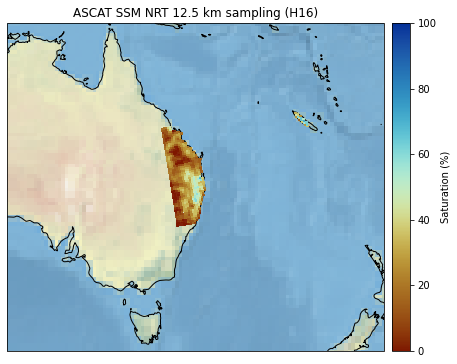

In [22]:
plot_crs = cartopy.crs.Mercator()
data_crs = cartopy.crs.PlateCarree()

fig = plt.figure(figsize=(7, 6))
ax = fig.add_axes([0.1, 0.1, 0.8, 0.8], projection=plot_crs)
ax.set_title('ASCAT SSM NRT 12.5 km sampling (H16)')
ax.coastlines()
ax.stock_img()
ax.set_extent([130, 175, -10, -42])

sc = ax.scatter(data['lon'], data['lat'], c=data['sm'], zorder=3, marker='s', s=2,
                transform=data_crs, cmap=cmc.roma, vmin=0, vmax=100)

divider = make_axes_locatable(ax)
ax_cb = divider.new_horizontal(size="5%", pad=0.1, axes_class=plt.Axes)
fig.add_axes(ax_cb)
cb1 = plt.colorbar(sc, cax=ax_cb)
cb1.set_label('Saturation (%)')

In [23]:
# lets resample to a 0.1 degree grid
# define the grid points in latitude and logitude
lats_dim = np.arange(-80, 80, 0.1)
lons_dim = np.arange(-160, 170, 0.1)

# make 2d grid out the 1D grid spacings
lons_grid, lats_grid = np.meshgrid(lons_dim, lats_dim)
    
resampled_data = resample.resample_to_grid({'sm': data['sm']}, 
                                           data['lon'], data['lat'], 
                                           lons_grid, lats_grid)

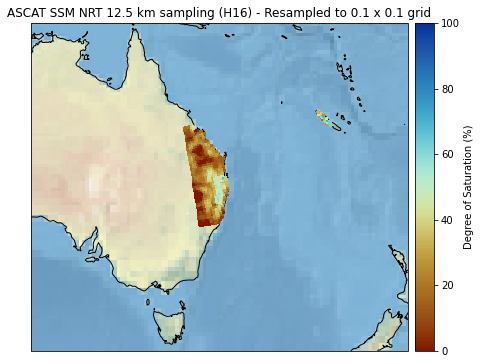

In [24]:
fig = plt.figure(figsize=(7, 6))
ax = fig.add_axes([0.1, 0.1, 0.8, 0.8], projection=plot_crs)
ax.set_title('ASCAT SSM NRT 12.5 km sampling (H16) - Resampled to 0.1 x 0.1 grid')
ax.coastlines()
ax.stock_img()
ax.set_extent([130, 175, -10, -42])

sc = ax.pcolormesh(lons_grid, lats_grid, resampled_data['sm'], zorder=3, 
                   cmap=cmc.roma, vmin=0, vmax=100, transform=data_crs)

divider = make_axes_locatable(ax)
ax_cb = divider.new_horizontal(size="5%", pad=0.1, axes_class=plt.Axes)
fig.add_axes(ax_cb)
cb1 = plt.colorbar(sc, cax=ax_cb)
cb1.set_label('Degree of Saturation (%)')

In [25]:
# lets resample to a 0.1 degree grid
# define the grid points in latitude and logitude
lats_dim = np.arange(-80, 80, 0.1)
lons_dim = np.arange(-160, 170, 0.1)

# make 2d grid out the 1D grid spacings
lons_grid, lats_grid = np.meshgrid(lons_dim, lats_dim)

resampled_sm = resample.resample_to_grid({'sm': data['sm']}, 
                                         data['lon'], data['lat'], 
                                         lons_grid, lats_grid)

resampled_sm_mean = resample.resample_to_grid({'sm_mean': data['sm_mean']}, 
                                              data['lon'], data['lat'], 
                                              lons_grid, lats_grid)

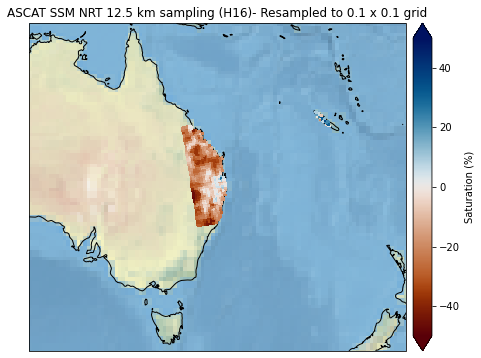

In [26]:
fig = plt.figure(figsize=(7, 6))
ax = fig.add_axes([0.1, 0.1, 0.8, 0.8], projection=plot_crs)
ax.set_title('ASCAT SSM NRT 12.5 km sampling (H16)- Resampled to 0.1 x 0.1 grid')
ax.coastlines()
ax.stock_img()
ax.set_extent([130, 175, -10, -42])

anomaly = resampled_sm['sm'] - resampled_sm_mean['sm_mean']

sc = ax.pcolormesh(lons_grid, lats_grid, anomaly, zorder=3, 
                   cmap=cmc.vik_r, vmin=-50, vmax=50, transform=data_crs)

divider = make_axes_locatable(ax)
ax_cb = divider.new_horizontal(size="5%", pad=0.1, axes_class=plt.Axes)
fig.add_axes(ax_cb)
cb1 = plt.colorbar(sc, cax=ax_cb, extend='both')
cb1.set_label('Saturation (%)')

## 3 Download, read and visualize ASCAT SSM CDR

* Download data from the H SAF FTP 
* Move the data into the correct location
* Read data
* Visualize data in time series
* Extract a temporal subset
* Performing some basic statistical analysis

### 3.1 Manual data download from H SAF FTP

E.g. use the terminal to download data:

```
ftp ftphsaf.meteoam.it
username: <your_username>
password: <your_password>
cd products/h113
get H113_1431.nc
exit
```

### 3.2 Read ASCAT SSM DR v5 12.5 km (H115)

In [27]:
root_path = os.path.join(os.getcwd(), 'data')
data_path = os.path.join(root_path, 'h111')
grid_path = os.path.join(root_path, 'grid')
static_layer_path = os.path.join(root_path, 'static_layer')

dr_reader = h_saf.AscatSsmDataRecord(data_path, grid_path, static_layer_path=static_layer_path)

#### Grid point locator

Grid points can be found using e.g. http://rs.geo.tuwien.ac.at/dv/dgg/

In [28]:
gpi = 2501225
ts = dr_reader.read(gpi)
dr_reader.close()
print(ts.head(3))

                            proc_flag  conf_flag  corr_flag  sm  sat_id  ssf  \
2007-01-01 21:06:01.843200          0          0          0  92       3    1   
2007-01-02 09:18:16.848000          0          0          0  91       3    1   
2007-01-03 10:37:43.104000          0          0          0  93       3    1   

                            dir  sm_noise  snow_prob  frozen_prob  \
2007-01-01 21:06:01.843200    0         3          0           29   
2007-01-02 09:18:16.848000    1         3          0           21   
2007-01-03 10:37:43.104000    1         3         11           29   

                            abs_sm_gldas  abs_sm_noise_gldas  abs_sm_hwsd  \
2007-01-01 21:06:01.843200           NaN                 NaN          NaN   
2007-01-02 09:18:16.848000           NaN                 NaN          NaN   
2007-01-03 10:37:43.104000           NaN                 NaN          NaN   

                            abs_sm_noise_hwsd  
2007-01-01 21:06:01.843200                NaN

### 3.3 Visualize ASCAT SSM DR v5 12.5 km (H115)

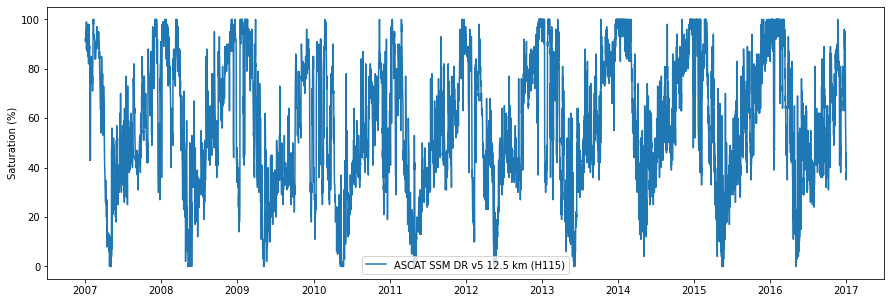

In [29]:
# show complete time series
fig, ax = plt.subplots(1, 1, figsize=(15, 5))
ax.plot(ts['sm'], label='ASCAT SSM DR v5 12.5 km (H115)')
ax.set_ylabel('Saturation (%)')
ax.legend()

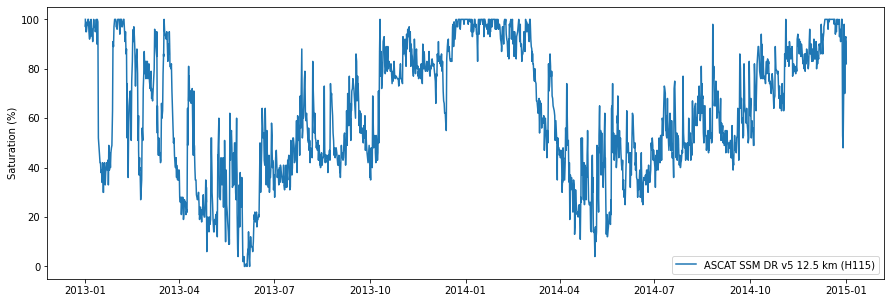

In [30]:
# show time series subset
fig, ax = plt.subplots(1, 1, figsize=(15, 5))
ax.plot(ts['2013':'2014']['sm'], label='ASCAT SSM DR v5 12.5 km (H115)')
ax.set_ylabel('Saturation (%)')
ax.legend()

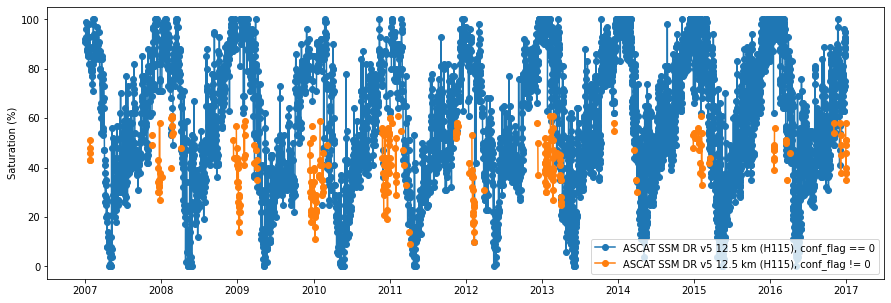

In [31]:
# show sm where 'conf_flag' != 0
fig, ax = plt.subplots(1, 1, figsize=(15, 5))
ax.plot(ts.where(ts['conf_flag'] == 0)['sm'], marker='o', label='ASCAT SSM DR v5 12.5 km (H115), conf_flag == 0')
ax.plot(ts.where(ts['conf_flag'] != 0)['sm'], marker='o', label='ASCAT SSM DR v5 12.5 km (H115), conf_flag != 0')
ax.set_ylabel('Saturation (%)')
ax.legend()

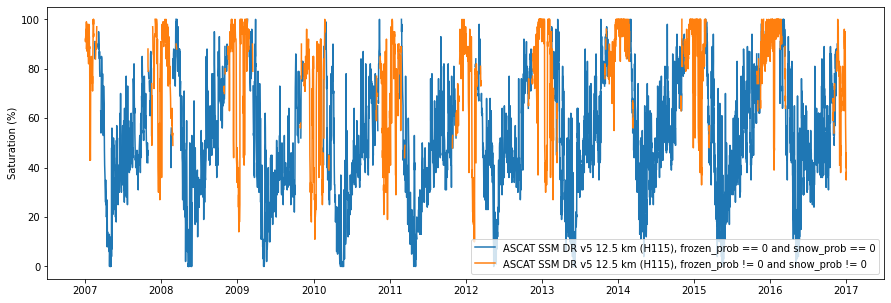

In [32]:
# show sm where 'frozen_prob' == 0
ts_masked = ts
ts_masked['valid'] = False
ts_masked.loc[(ts['frozen_prob'] == 0) & (ts['snow_prob'] == 0), 'valid'] = True

fig, ax = plt.subplots(1, 1, figsize=(15, 5))
ax.plot(ts_masked.where(ts_masked['valid'])['sm'], label='ASCAT SSM DR v5 12.5 km (H115), frozen_prob == 0 and snow_prob == 0')
ax.plot(ts_masked.where(~ts_masked['valid'])['sm'], label='ASCAT SSM DR v5 12.5 km (H115), frozen_prob != 0 and snow_prob != 0')
ax.set_ylabel('Saturation (%)')
ax.legend()

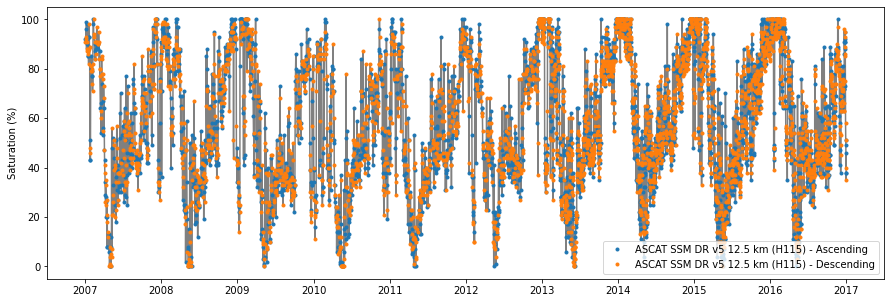

In [33]:
# show descending, ascending
fig, ax = plt.subplots(1, 1, figsize=(15, 5))
ax.plot(ts['sm'], c='gray')
ax.plot(ts['sm'].where(ts['dir'] == 0), label='ASCAT SSM DR v5 12.5 km (H115) - Ascending', ls='none', marker='.')
ax.plot(ts['sm'].where(ts['dir'] == 1), label='ASCAT SSM DR v5 12.5 km (H115) - Descending', ls='none', marker='.')
ax.set_ylabel('Saturation (%)')
ax.legend()

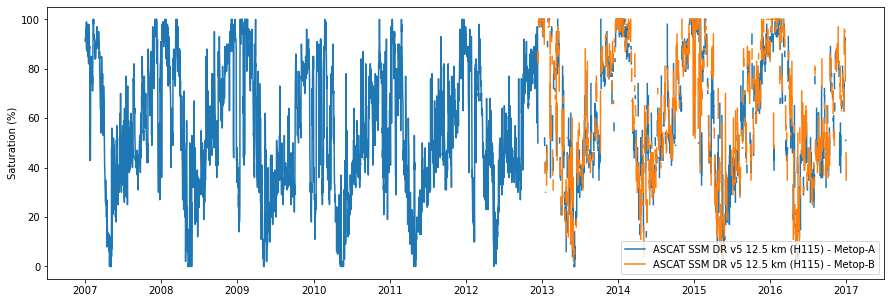

In [34]:
# show metop-a, metop-b
fig, ax = plt.subplots(1, 1, figsize=(15, 5))
ax.plot(ts['sm'].where(ts['sat_id'] == 3), label='ASCAT SSM DR v5 12.5 km (H115) - Metop-A')
ax.plot(ts['sm'].where(ts['sat_id'] == 4), label='ASCAT SSM DR v5 12.5 km (H115) - Metop-B')
ax.set_ylabel('Saturation (%)')
ax.legend()

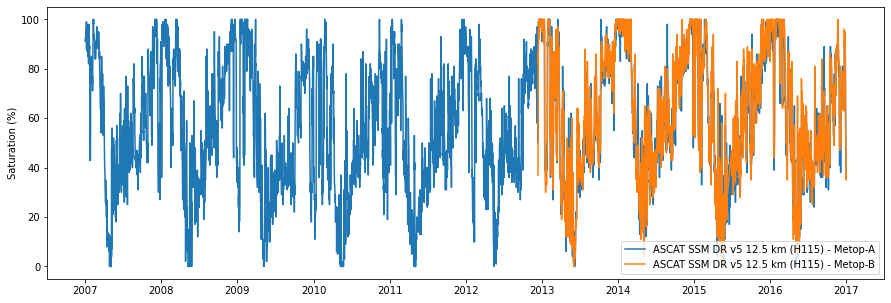

In [35]:
# show metop-a, metop-b
fig, ax = plt.subplots(1, 1, figsize=(15, 5))
ax.plot(ts.loc[ts['sat_id'] == 3, 'sm'], label='ASCAT SSM DR v5 12.5 km (H115) - Metop-A')
ax.plot(ts.loc[ts['sat_id'] == 4, 'sm'], label='ASCAT SSM DR v5 12.5 km (H115) - Metop-B')
ax.set_ylabel('Saturation (%)')
ax.legend()

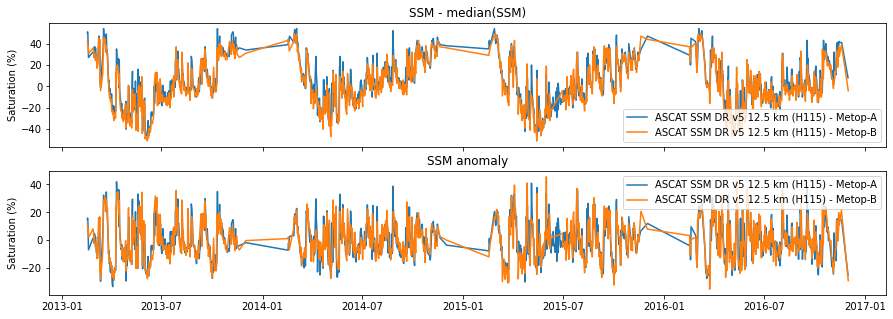

In [36]:
from pytesmo.time_series.anomaly import calc_anomaly

mask = (ts['frozen_prob'] > 0) | (ts['snow_prob'] > 0)
ts = ts.mask(mask)

ssm_a = ts.loc[ts['sat_id'] == 3, 'sm']
ssm_b = ts.loc[ts['sat_id'] == 4, 'sm']

ssm_a_anom = calc_anomaly(ts.loc[ts['sat_id'] == 3, 'sm'])
ssm_b_anom = calc_anomaly(ts.loc[ts['sat_id'] == 4, 'sm'])

# plot anomaly
fig, ax = plt.subplots(2, 1, figsize=(15, 5), sharex=True)

ax[0].plot(ssm_a['2013':] - ssm_a.median(), label='ASCAT SSM DR v5 12.5 km (H115) - Metop-A')
ax[0].plot(ssm_b['2013':] - ssm_b.median(), label='ASCAT SSM DR v5 12.5 km (H115) - Metop-B')
ax[0].set_ylabel('Saturation (%)')
ax[0].set_title('SSM - median(SSM)')
ax[0].legend()

ax[1].plot(ssm_a_anom['2013':], label='ASCAT SSM DR v5 12.5 km (H115) - Metop-A')
ax[1].plot(ssm_b_anom['2013':], label='ASCAT SSM DR v5 12.5 km (H115) - Metop-B')
ax[1].set_ylabel('Saturation (%)')
ax[1].set_title('SSM anomaly')
ax[1].legend()